# Data Augmentation

In [1]:
import os
from os.path import join
import Augmentor
from Augmentor.Operations import Operation
import cv2
from PIL import Image


from cancer.variables import CANCER_DATA_DIR
from cancer.visulize import show_image

In [2]:
from matplotlib import pyplot as plt

In [142]:
data_path = join(CANCER_DATA_DIR, '..', 'notebooks', 'resources')
orig = cv2.imread('./resources/example_cell.png')

### Helpers

In [189]:
def get_aug_image(pipline):
    gen = pipeline.keras_generator(batch_size=4, scaled=False)
    return next(gen)[0]

In [185]:
def compare_augment(orig, augm_list):
    plt.figure(figsize=(20,20))
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    plt.subplot(151)
    plt.imshow(orig)
    plt.axis('off')
    for i in range(4):
        augm = augm_list[i].squeeze()
        #augm = cv2.cvtColor(augm, cv2.COLOR_BGR2RGB)
        plt.subplot(1,5,i+2)
        plt.imshow(augm)
        plt.axis('off')

    plt.show()

In [197]:
def save_augment(orid_img, aug_img, aug_name):
    save_dir = join(data_path, '..', 'augmentation_examples')
    Image.fromarray(orig_img).save(join(save_dir, f'{aug_name}_orig.png'))
    for i in range(4):
        Image.fromarray(aug_img[i].squeeze()).save(join(save_dir, f'{aug_name}_aug{i+1}.png'))
    print('saved images.')

## Rotation

In [187]:
pipeline = Augmentor.Pipeline(data_path)
pipeline.flip_left_right(probability=.5)
pipeline.flip_top_bottom(probability=.5)

pipeline.rotate(probability=1, max_left_rotation=25, max_right_rotation=25)

Initialised with 1 image(s) found.
Output directory set to /Users/seanwade/projects/cancerDetection/data/../notebooks/resources/output.

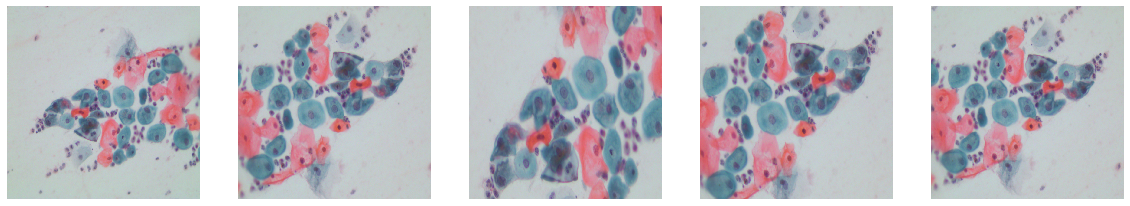

In [195]:
aug_img = get_aug_image(pipeline)
compare_augment(orig_img, aug_img)

In [198]:
save_augment(orig_img, aug_img, 'rotate')

saved images.


## Zoom

Initialised with 1 image(s) found.
Output directory set to /Users/seanwade/projects/cancerDetection/data/../notebooks/resources/output.

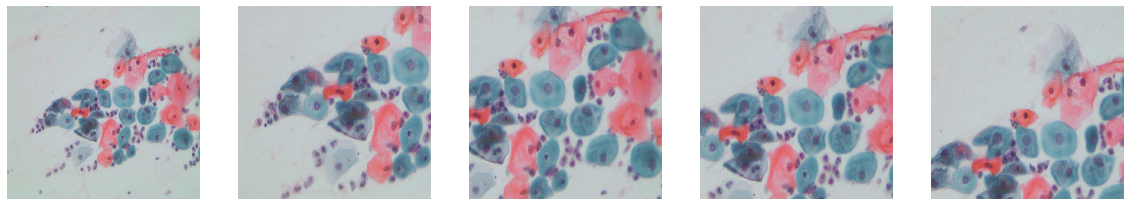

In [199]:
pipeline = Augmentor.Pipeline(data_path)
pipeline.zoom_random(probability=1, percentage_area=0.6)

aug_img = get_aug_image(pipeline)
compare_augment(orig_img, aug_img)

In [200]:
save_augment(orig_img, aug_img, 'zoom')

saved images.


## Elastic Deformation

Initialised with 1 image(s) found.
Output directory set to /Users/seanwade/projects/cancerDetection/data/../notebooks/resources/output.

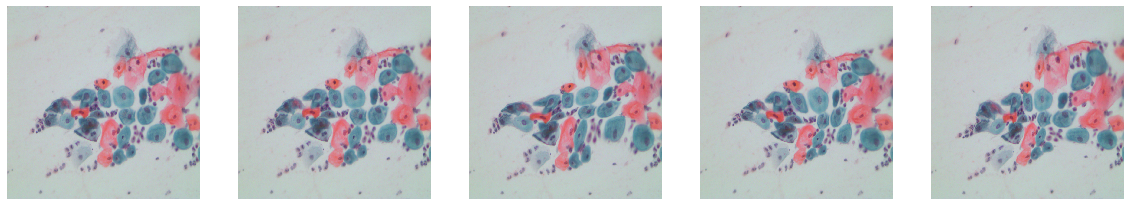

In [209]:
pipeline = Augmentor.Pipeline(data_path)
pipeline.random_distortion(probability=.3, grid_width=5, grid_height=5, magnitude=50)

aug_img = get_aug_image(pipeline)
compare_augment(orig_img, aug_img)

In [210]:
save_augment(orig_img, aug_img, 'elastic_deformation')

saved images.


## Random Crop

Initialised with 1 image(s) found.
Output directory set to /Users/seanwade/projects/cancerDetection/data/../notebooks/resources/output.

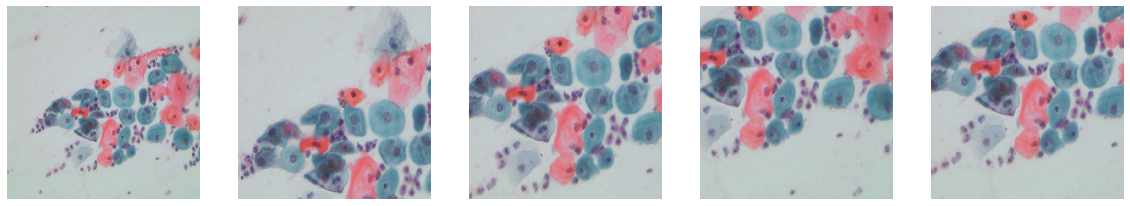

In [211]:
pipeline = Augmentor.Pipeline(data_path)
pipeline.crop_random(1, .6)

aug_img = get_aug_image(pipeline)
compare_augment(orig_img, aug_img)

In [212]:
save_augment(orig_img, aug_img, 'random_crop')

saved images.


## Flip

Initialised with 1 image(s) found.
Output directory set to /Users/seanwade/projects/cancerDetection/data/../notebooks/resources/output.

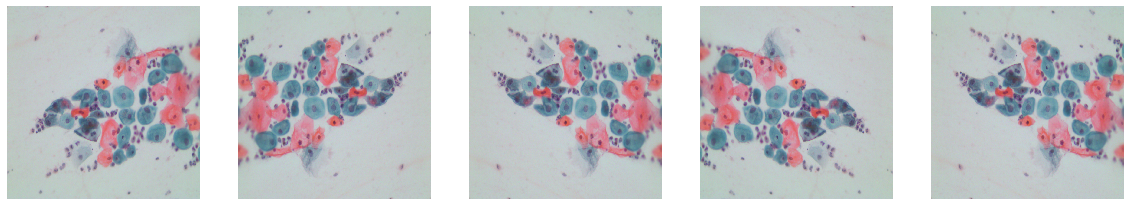

In [216]:
pipeline = Augmentor.Pipeline(data_path)
pipeline.flip_left_right(probability=0.5)
pipeline.flip_top_bottom(probability=0.5)

aug_img = get_aug_image(pipeline)
compare_augment(orig_img, aug_img)

In [217]:
save_augment(orig_img, aug_img, 'flip')

saved images.
